In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import squarify

In [2]:
file_name = "erros.csv"

errors_df = pd.read_csv(file_name)
errors_df

,Notes_1,Notes_2,Notes_3,Notes_4
0,spelling sellection,syllable division,NaN,Error
1,NaN,NaN,NaN,No error
2,NaN,NaN,NaN,No error
3,NaN,NaN,NaN,No error
4,NaN,NaN,NaN,No error
...,...,...,...,...
12367,NaN,NaN,NaN,No error
12368,NaN,NaN,NaN,No error
12369,NaN,NaN,NaN,No error
12370,NaN,NaN,NaN,No error


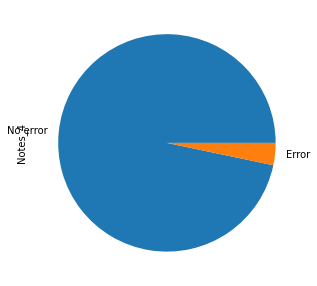

In [7]:
error_count = errors_df.Notes_4.value_counts()
plot = error_count.plot.pie(y='Notes_4', figsize=(5, 5))

In [9]:
error_count = len(errors_df[errors_df["Notes_4"]=="Error"])
error_count

406

In [10]:
error_percentage = error_count/len(errors_df)
error_percentage

0.03281603621079858

In [ ]:
ax = df.plot.hist(bins=12, alpha=0.5)

In [11]:
error_count_df=errors_df[errors_df["Notes_4"]=="Error"]
error_count_df

,Notes_1,Notes_2,Notes_3,Notes_4
0,spelling sellection,syllable division,NaN,Error
20,empty,syllable division,NaN,Error
63,false diphthong,NaN,NaN,Error
156,empty,NaN,NaN,Error
232,empty,NaN,NaN,Error
...,...,...,...,...
12265,spelling sellection,syllable division,IPA uniformization,Error
12304,false diphthong,NaN,NaN,Error
12306,false diphthong,NaN,NaN,Error
12349,false diphthong,NaN,NaN,Error


In [19]:
error_count_df.Notes_1.value_counts()/len(error_count_df)

false diphthong        0.906404
empty                  0.064039
spelling sellection    0.029557
Name: Notes_1, dtype: float64

<AxesSubplot:>

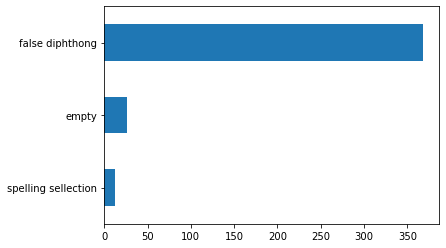

In [16]:
error_count_df.Notes_1.value_counts().sort_values().plot(kind = 'barh')

In [18]:
error_count_df.Notes_2.value_counts()/len(error_count_df)

syllable division    0.019704
Name: Notes_2, dtype: float64

In [20]:
error_count_df.Notes_3.value_counts()/len(error_count_df)

IPA uniformization    0.004926
Name: Notes_3, dtype: float64